# Doctor Type ML Models - Logistic Regression
Amy Jin

6/19/2018, py27

# 5 Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data. Here are the steps:

Set-up the evaluaion method.
Build a couple basic models to predict Y from X.
Select the best model.

## 5.1 Classification Evaluation Method
Typically ,we are using the metric of “Accuracy” to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the metric variable when we run build and evaluate each model next. However, in this case, we have unbalanced data, accuracy is not enough to give us clear idea on the performance. Thus, the following 5 methods are adopted to evaluate predictive models:

* Accuracy
* Confusion Matrix
* ROC
* AIC
* Null Deviance and Residual Deviance


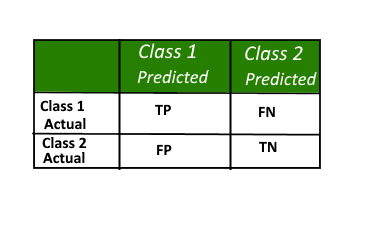

In [8]:
from IPython.display import Image
Image(filename='Confusion_Matrix2.png',width=400, height=400)

A **confusion matrix** is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

Definition of the Terms:
* Positive (P) : Observation is positive/yes (for example: doctor class is 1).
* Negative (N) : Observation is not positive (for example: is not class 1).
* True Positive (TP) : Observation is positive, and is predicted to be positive (for example: the doctor is class 1 and predicted as class 1). 
* False Negative (FN) : Observation is positive, but is predicted negative(for example: the doctor is class 1 and predicted as class 0)
* True Negative (TN) : Observation is negative, and is predicted to be negative (for example: the doctor is class 0 and predicted as class 0).
* False Positive (FP) : Observation is negative, but is predicted positive (for example: the doctor is class 0 and predicted as class 1).

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

1) Accuracy: Overall, how often is the classifier correct?
$$Accuracy = (TP+TN)/total $$

2) Misclassification Rate: Overall, how often is it wrong?
$$Misclassification Rate = (FP+FN)/total = 1- Accuracy$$
also known as "Error Rate"

3) True Positive Rate: When it's actually yes, how often does it predict yes?
$$True Positive Rate = TP/actual yes$$
also known as "Sensitivity" or "Recall"

4) False Positive Rate: When it's actually no, how often does it predict yes?
$$ False Positive Rate = FP/actual no $$

5) Specificity: When it's actually no, how often does it predict no?
$$Specificity = TN/actual no = 1 - False Positive Rate$$

6) Precision: When it predicts yes, how often is it correct?
$$Precision = TP/predicted yes$$

7) Prevalence: How often does the yes condition actually occur in our sample?
$$ Prevalence = actual yes/total$$

A couple other terms are also worth mentioning:

* Positive Predictive Value: This is very similar to precision, except that it takes prevalence into account. In the case where the classes are perfectly balanced (meaning the prevalence is 50%), the positive predictive value (PPV) is equivalent to precision. (More details about PPV.)

* Null Error Rate: This is how often you would be wrong if you always predicted the majority class. (In our example, the null error rate would be 60/165=0.36 because if you always predicted yes, you would only be wrong for the 60 "no" cases.) This can be a useful baseline metric to compare your classifier against. However, the best classifier for a particular application will sometimes have a higher error rate than the null error rate, as demonstrated by the Accuracy Paradox.

* Cohen's Kappa: This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate. (More details about Cohen's Kappa.)

* F Score: This is a weighted average of the true positive rate (recall) and precision. (More details about the F Score.)

* ROC Curve: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. (More details about ROC Curves.)

High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

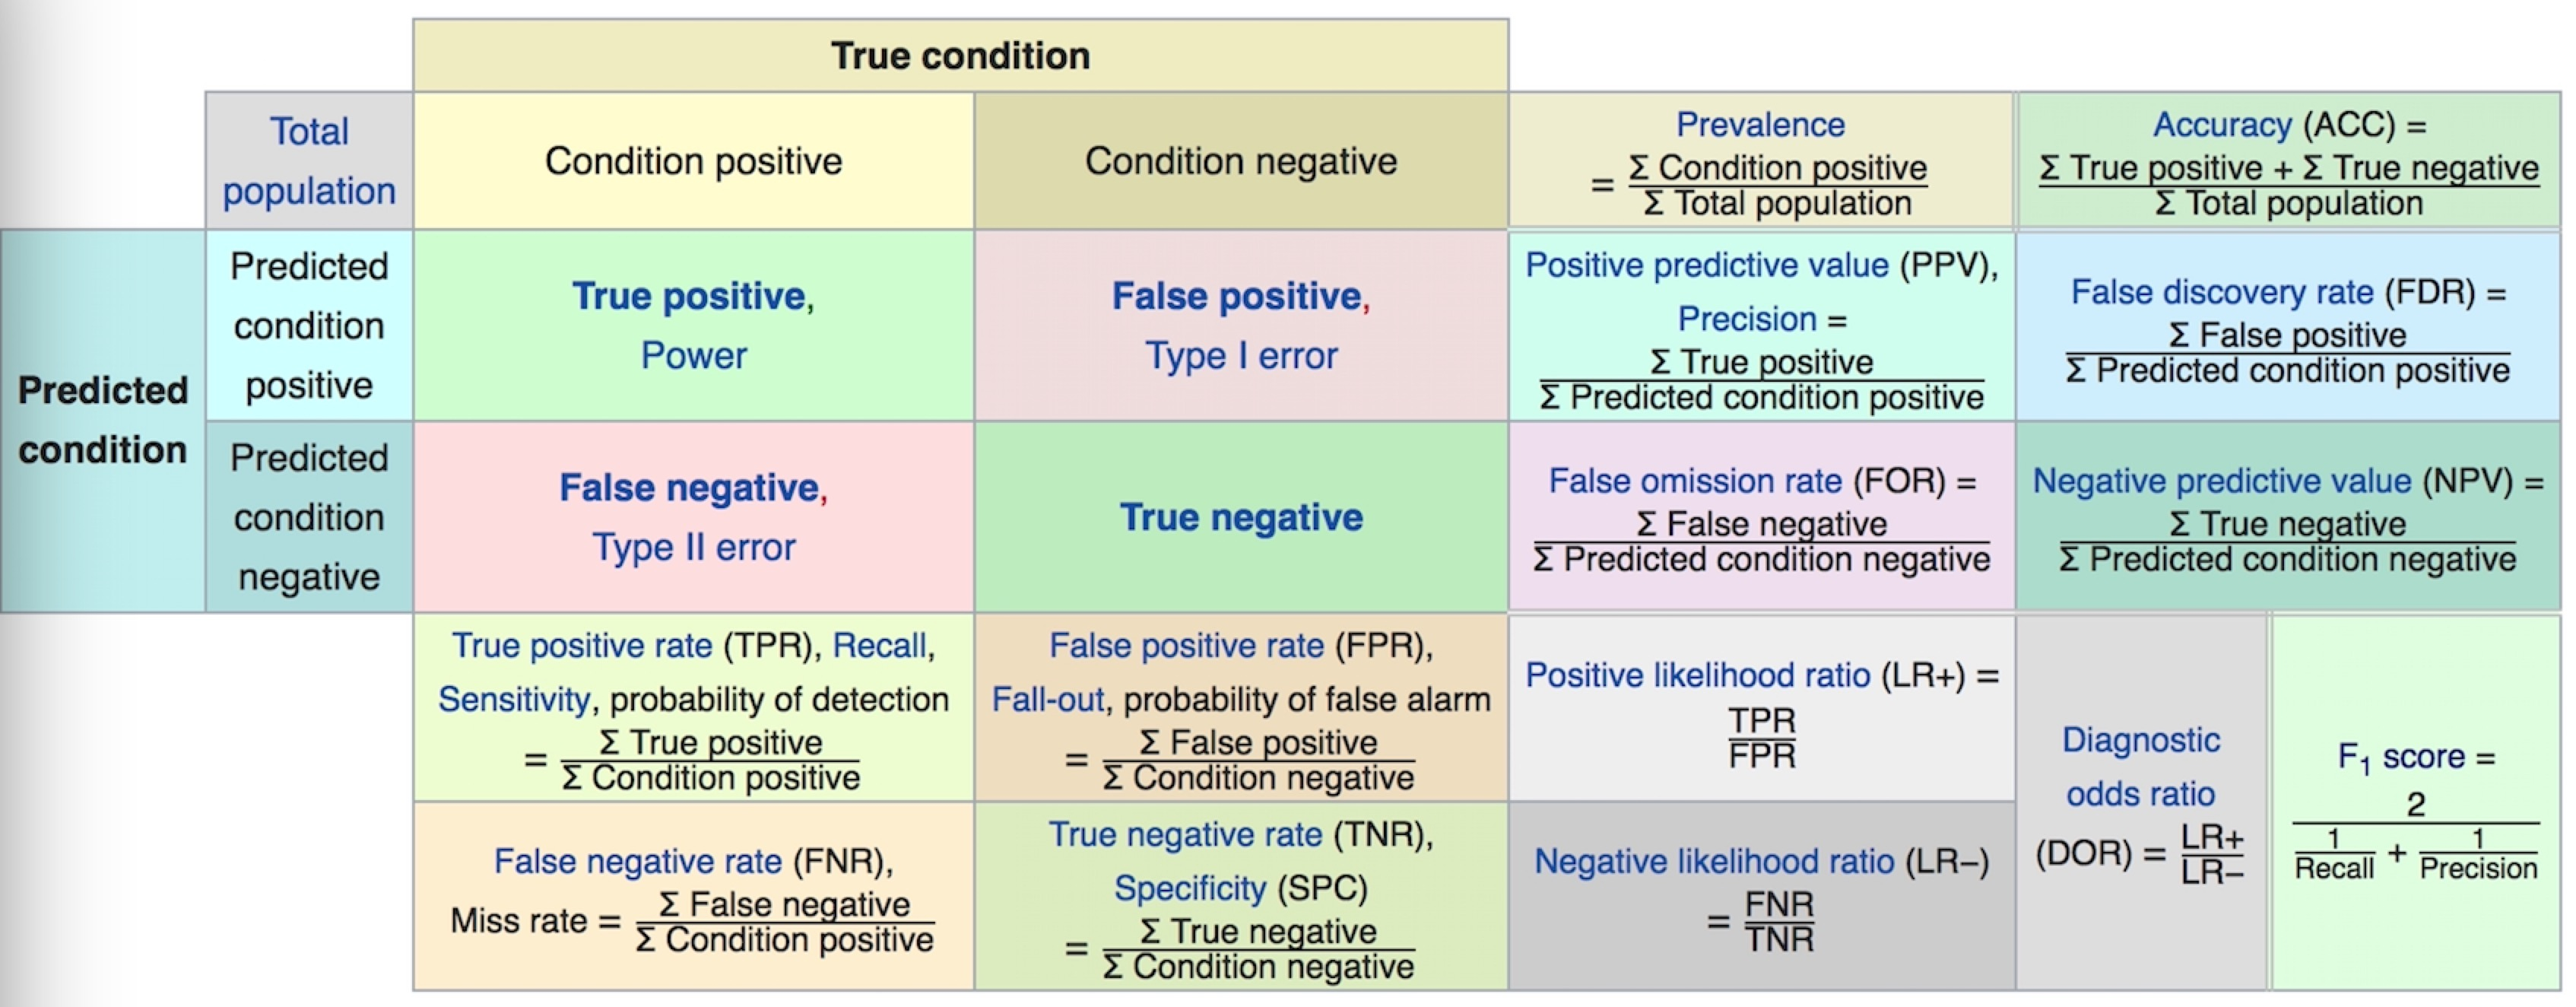

In [10]:
from IPython.display import Image
Image(filename='confusion_matrix.jpg',width=950, height=950)



## 5.2 Build Models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 5 different algorithms:

* Logistic Regression.
* Decision Tree & Random Forest (RF).
* Naive Bayes.
* Support Vector Machines (SVM).
* k-Nearest Neighbors (kNN).
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA)
* Boosting.
* Classification and Regression Trees (CART).


https://docs.microsoft.com/en-us/azure/machine-learning/studio/algorithm-choice
https://www.cs.princeton.edu/~schapire/talks/picasso-minicourse.pdf

This is a good mixture of simple linear (LDA), nonlinear (CART, kNN, Logistic) and complex nonlinear methods (SVM, RF). We reset the random number seed before reach run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

### 5.2.1 Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

#### Logistic Regression Assumptions

* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

In [49]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
data = pd.read_csv("/Users/yuejin/Documents/AmyJin_2018/Work/Test/2018_03/Doctor_Type_ML/final_table2.csv")
train, test = train_test_split(data, test_size=0.2, random_state = 100)

In [50]:
X_train = train.iloc[:,4:14]
y_train = train.iloc[:,1]
X_test = test.iloc[:,4:14]
y_test = test.iloc[:,1]

In [4]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)

In [5]:
result=logit_model.fit()
# print result.summary()

Optimization terminated successfully.
         Current function value: 0.589765
         Iterations 13


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Performance of Model

How does the model work for unknown test data? There are 5 ways：

1) The first evaluation is by computing accuracy. The accuracy for the test data is: 0.9966934595015995. Train accuracy is 0.9968479911824402.

In [8]:
# Use score method to get accuracy of model
test_acc = logisticRegr.score(X_test, y_test)
print(test_acc)
train_acc = logisticRegr.score(X_train, y_train)
print(train_acc)

0.9963439877416059
0.9969151981934755


2) Another way to evaluate classification performance is confusion matrix. From the confusion matrix, we can see that 1 out of 0 true true positive examples, and 37072 true negative examples.

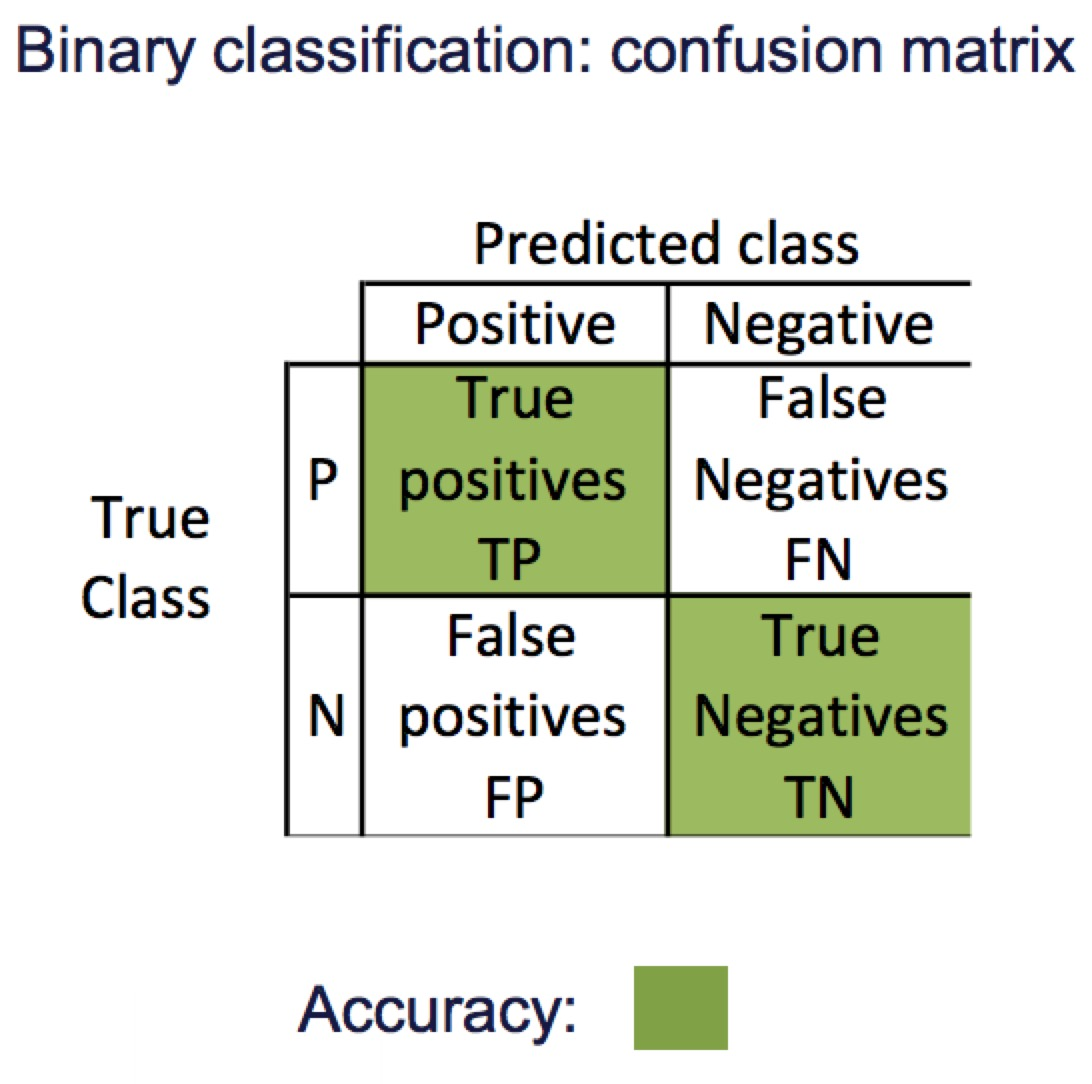

In [3]:
from IPython.display import Image
Image(filename='confusion.jpg',width=300, height=300)

[[37062     4]
 [  132     1]]


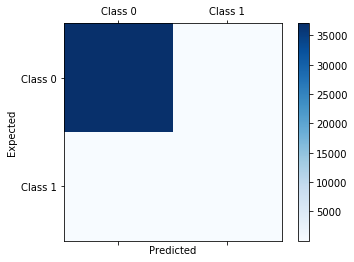

Accuracy of logistic regression classifier on test set: 0.9963439877416059


In [9]:
y_pred = logisticRegr.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print('Accuracy of logistic regression classifier on test set: {:.16f}'.format(logisticRegr.score(X_test, y_test)))

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37066
          1       0.20      0.01      0.01       133

avg / total       0.99      1.00      0.99     37199



3) ROC Curve is a third way. Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate. ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model. Below is a sample ROC curve. The ROC of a perfect predictive model has TP equals 1 and FP equals 0. This curve will touch the top left corner of the graph.

4) AIC (Akaike Information Criteria) – The analogous metric of adjusted R² in logistic regression is AIC. AIC is the measure of fit which penalizes model for the number of model coefficients. Therefore, we always prefer model with minimum AIC value. For this model, AIC is 5546.9 The samller the better, we could compare the AIC with other models later.

5) Null Deviance and Residual Deviance – Null Deviance indicates the response predicted by a model with nothing but an intercept. Lower the value, better the model. Residual deviance indicates the response predicted by a model on adding independent variables. Lower the value, better the model.

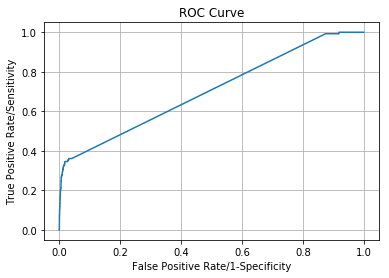

In [11]:
from sklearn import metrics
import pandas as pd

preds = logisticRegr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/1-Specificity')
plt.grid(True)
plt.title('ROC Curve')
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.7019170031591684

The AUC Score is 0.6928265511331355. Concerning the AUC, a simple rule of thumb to evaluate a classifier based on this summary value is the following:

* .90-1 = very good (A)
* .80-.90 = good (B)
* .70-.80 = not so good (C)
* .60-.70 = poor (D)
* .50-.60 = fail (F)

Reference: https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve

### Feature selection

Feature selection is the process of selecting a subset of relevant features for use in model construction

Feature selection methods aid us in our mission to create an accurate predictive model. They help us by choosing features that will give you as good or better accuracy whilst requiring less data.

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

Fewer attributes is desirable because it reduces the complexity of the model, and a simpler model is simpler to understand and explain.

Reference: https://machinelearningmastery.com/an-introduction-to-feature-selection/
https://machinelearningmastery.com/feature-selection-machine-learning-python/

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

#### 1) Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Here use the chi squared (chi^2) statistical test for non-negative features to select 6 of the best features from our dataset.

In [13]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)
# summarize selected features
print(features[0:7,:])

[7.315e+02 7.662e+02 1.953e+02 2.677e+02 6.568e+00 7.415e+02 2.220e+02
 2.032e+02 2.848e+01 6.544e-01]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


You can see the scores for each attribute and the 6 attributes chosen (those with the highest scores): X2, X6, X1, X7, X4, X8. Now let's see how it works with the best 6 features. 

[[37063     3]
 [  133     0]]
Accuracy of logistic regression classifier on test set: 0.9963439877416059
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37066
          1       0.00      0.00      0.00       133

avg / total       0.99      1.00      0.99     37199



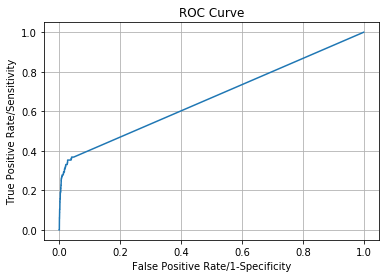

0.666307286048175

In [14]:
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(X_train.iloc[:,[1,5,0,6,3,7]], y_train)
y_pred = logisticRegr.predict(X_test.iloc[:,[1,5,0,6,3,7]])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.16f}'.format(logisticRegr.score(X_test.iloc[:,[1,5,0,6,3,7]], y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
preds = logisticRegr.predict_proba(X_test.iloc[:,[1,5,0,6,3,7]])[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/1-Specificity')
plt.grid(True)
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, preds)

From the above results, we can see that accuarcy, confusion matrix and AUC are better than the original 10-feature model, from which we can conclude that some features are unirrelevant to our prediction. 

To find how many of the features can contribute to the best result, we need a for-loop to find the best number of features. 

#### 2) Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) is a second method to select features, it works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute. Here use RFE to select the top 6 features.

In [15]:
from sklearn.feature_selection import RFE
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 6
Selected Features: [ True  True  True  True  True False  True False False False]
Feature Ranking: [1 1 1 1 1 3 1 2 4 5]


We can see that RFE chose the the top 6 features as X1 - X5 and X7. These are marked True in the support_ array and marked with a choice “1” in the ranking_ array. The features selected are different from the first method. In this case, we need the test result to tell which is better. 

[[37064     2]
 [  132     1]]
Accuracy of logistic regression classifier on test set: 0.9964246350708352
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37066
          1       0.33      0.01      0.01       133

avg / total       0.99      1.00      0.99     37199



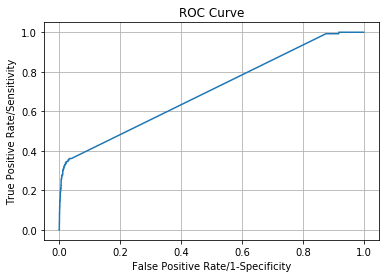

0.7017038089747653

In [16]:
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(X_train.iloc[:,[0,1,2,3,4,6]], y_train)
y_pred = logisticRegr.predict(X_test.iloc[:,[0,1,2,3,4,6]])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print('Accuracy of logistic regression classifier on test set: {:.16f}'.format(logisticRegr.score(X_test.iloc[:,[1,5,0,6,3,7]], y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
preds = logisticRegr.predict_proba(X_test.iloc[:,[0,1,2,3,4,6]])[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/1-Specificity')
plt.grid(True)
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, preds)

We can see that the second method is significantly better than the model selected by the first method. However, it is still not good enough. 

#### 3) Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [17]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.229 0.187 0.114 0.086 0.101 0.081 0.062 0.056 0.048 0.035]


[[37063     3]
 [  132     1]]
Accuracy of logistic regression classifier on test set: 0.9964246350708352
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37066
          1       0.25      0.01      0.01       133

avg / total       0.99      1.00      0.99     37199



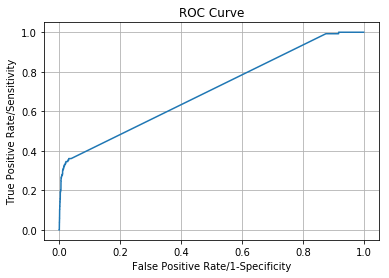

0.7019841461420777

In [18]:
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(X_train.iloc[:,[0,1,2,3,4,5]], y_train)
y_pred = logisticRegr.predict(X_test.iloc[:,[0,1,2,3,4,5]])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.16f}'.format(logisticRegr.score(X_test.iloc[:,[1,5,0,6,3,7]], y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
preds = logisticRegr.predict_proba(X_test.iloc[:,[0,1,2,3,4,5]])[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/1-Specificity')
plt.grid(True)
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, preds)

Similar with the second method.

#### 4) PCA
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. It is not a method of feature selection. Generally this is called a data reduction technique. But it can reduce the dimension of the dataset, so I'll try PCA to compare with feature selection models. Let's try to select 2 principal components.

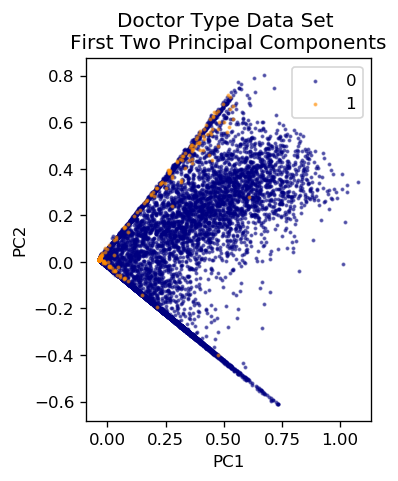

In [19]:
from sklearn.decomposition import PCA
X = train.iloc[:,4:14]
y = train.iloc[:,1]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='0', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='1', s=2, color='darkorange')
plt.legend()
plt.title('Doctor Type Data Set \nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [20]:
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X_train)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

Explained Variance: [0.642 0.358]
[[ 1.    0.01]
 [-0.01  1.  ]]


You can see that the transformed dataset (2 principal components) bare little resemblance to the source data. But the first 2 PCs could explain most of the raw variance. 

#### 5) Lasso Logistic Regression

Later ...

### Deal with Imbalanced Data

Another problem found is that the data is imbalanced, which might be a reason that our model is not good enough. There are a few mehtod to deal with this issue, they are:

* Collect more data
* Use confusion matrix, precision, recall, F1 score, Kappa, ROC curves
* Try resampling dataset
* Try generate synthetic samples
* Try different algorithms
* Try penalized models
* Try a different perspective
* Creative ...

Reference: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/


Here I will try resample techniques, such as bootstrap, to increase samples in class 0. 

http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/over-sampling/plot_random_over_sampling.html

In [39]:
train_1 = train[train.iloc[:, 1] == 1] # train set with class 1
train_0 = train[train.iloc[:, 1] == 0] # train set with class 0
print train_1.shape[0], train_0.shape[0], train_0.shape[0]/train_1.shape[0]
print X_train_res.shape, X_train.shape

456 148338 325
(222552, 2) (111595, 2)


Now upsample/oversample the class 1 train data. One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The RandomOverSampler offers such scheme:

In [37]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_train_res).items()))

/Users/yuejin/miniconda3/envs/py27/lib/python2.7/site-packages/imblearn/utils/deprecation.py:55: DeprecationWarning: In the estimator <class 'imblearn.over_sampling.smote.SMOTE'>, the parameter 'ratio' isdeprecated from 0.4 and will be removed in 0.6. Use 'sampling_strategy' instead.
  category=DeprecationWarning)


[(0, 111276), (1, 111276)]


Or we can do oversample by ros.

In [59]:
X_train = train.iloc[:,4:14]
y_train = train.iloc[:,1]
X_test = test.iloc[:,4:14]
y_test = test.iloc[:,1]
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
print X_resampled.shape, y_resampled.shape
print X_train.shape, y_train.shape

 [(0, 148336), (1, 148336)]
(296672, 10) (296672,)
(148794, 10) (148794,)


Let's do the logistic regression after balancing the train data.

[[36543   525]
 [   86    45]]
Accuracy of logistic regression classifier on test set: 0.9835748272803032
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     37068
          1       0.08      0.34      0.13       131

avg / total       0.99      0.98      0.99     37199



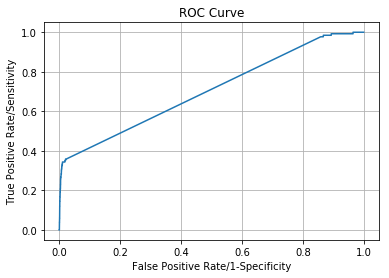

0.7050501162707367

In [52]:
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(X_resampled, y_resampled)
y_pred = logisticRegr.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print('Accuracy of logistic regression classifier on test set: {:.16f}'.format(logisticRegr.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
preds = logisticRegr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/1-Specificity')
plt.grid(True)
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, preds)

From the oversampling result, we could found that oversamplying could significantly increase our recall for class 1 but reduce the precision of class 1 and cause minor influence on class 0. Oversamplying has good influence to our overall performance.

Here try *Recursive Feature Elimination*

In [53]:
print X_resampled.shape, y_resampled.shape
from sklearn.feature_selection import RFE
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X_resampled, y_resampled)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

(296672, 10) (296672,)
Num Features: 6
Selected Features: [ True  True  True False  True  True False False False  True]
Feature Ranking: [1 1 1 5 1 1 4 3 2 1]


[[36650   418]
 [   86    45]]
Accuracy of logistic regression classifier on test set: 0.9864512486894809
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     37068
          1       0.10      0.34      0.15       131

avg / total       0.99      0.99      0.99     37199



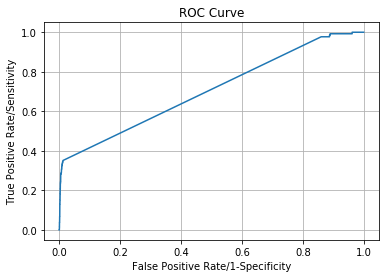

0.7050187112276426

In [65]:
logisticRegr = LogisticRegression(random_state=0)
X_resampled = pd.DataFrame(X_resampled)
logisticRegr.fit(X_resampled.iloc[:,[0,1,2,4,5,9]], y_resampled)
y_pred = logisticRegr.predict(X_test.iloc[:,[0,1,2,4,5,9]])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print('Accuracy of logistic regression classifier on test set: {:.16f}'.format(logisticRegr.score(X_test.iloc[:,[0,1,2,4,5,9]], y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
preds = logisticRegr.predict_proba(X_test.iloc[:,[0,1,2,4,5,9]])[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate/Sensitivity')
plt.xlabel('False Positive Rate/1-Specificity')
plt.grid(True)
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, preds)

Not much change after elimite 4 features.

References:  https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/ https://www.geeksforgeeks.org/confusion-matrix-machine-learning/